**Load the required libraries and datasets**

In [1]:
# Libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.utils import shuffle

sns.set()

In [2]:
# Data
## Successfull appointment data 
seen_df = pd.read_csv("../data/exports/successfull-appointments.csv")

## Post intake data 
df = pd.read_csv("../data/exports/post-intake.csv")
df.head()

,Chartnumber,First post-enrollment service,First post-intake service,Post-intake days,Days btn MHinfusion and Intake,Visits,MH infusions,infusions outside Cambridge,Visits outside Cambridge,Intake Facility City,Patient category
0,1,Intake,TMS,14.0,NaN,49,0,0,0,CAMBRIDGE,before mid-2023
1,2,MH Infusion,NaN,NaN,NaN,8,8,0,0,CAMBRIDGE,before mid-2023
2,9,Intake,TMS,9.0,66.0,68,30,0,0,CAMBRIDGE,before mid-2023
3,6,Intake,MH Infusion,0.0,0.0,16,13,0,0,CAMBRIDGE,before mid-2023
4,12,Intake,NaN,NaN,NaN,1,0,0,0,CAMBRIDGE,before mid-2023


In [3]:
# Convert appointment date to datetime 
seen_df["Date"] = pd.to_datetime(seen_df["Date"])

# Order the dataset by date 
seen_df = seen_df.sort_values(by="Date", ascending=True)
seen_df.reset_index(drop=True, inplace=True)

# Data Analysis

In [4]:
def remove_outliers(df, variable):
    """
    Docstring
    This function will remove the outliers from the variable in the data set
    before boxplot
    - Uses the IQR method 
    """
    # Calculate Q1, Q3, and IQR
    Q1 = df[variable].quantile(0.25)  # 25th percentile
    Q3 = df[variable].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data to remove outliers
    df_no_outliers = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]

    return df_no_outliers

Here are the data analysis Ideas

- How the long did it take the patients to receive their first service after intake? This will be compared among the categories, also between Cambridge facilities and other facilities. **Visualization type** boxplots(spread) and bar charts(summary comparison).
- Repeat the above for days between the first MH infusion and intake. 
- How many days did it take to get the succeeding service? Are there any delays that are connected with MH infusion drop? (Delays increasing or reducing rapidly since mid of 2023). 
- Are patients preferring other facilities outside Cambridge after their intake?
- Are there enough campaigns and conversions? This will be determine by the number of intakes over time. 
- How many MH infusions do patients take? Compare by their segments and facility city

**How the long did it take the patients to receive their first service after intake? This will be compared among the categories, also between Cambridge facilities and other facilities. Visualization type boxplots(spread) and bar charts(summary comparison).**

Text(0.5, 1.0, 'Delay of First Service after Intake(Spread & Distribution)')

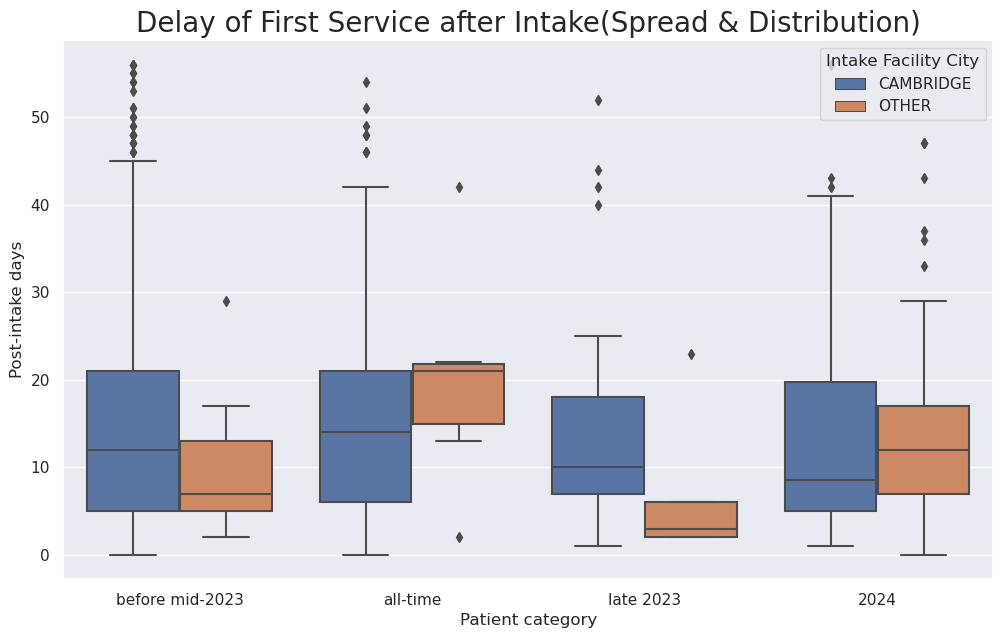

In [5]:
# Post-intake Service Delays
## Select the required columns 
selected_columns = ["Patient category", "Post-intake days", "Intake Facility City"]
select_df = df[selected_columns]

## Remove outliers
select_df = remove_outliers(select_df, "Post-intake days")

## Plotting 
plt.figure(figsize=(12, 7))
sns.boxplot(x="Patient category", y="Post-intake days", 
            hue="Intake Facility City", data=select_df)
plt.title("Delay of First Service after Intake(Spread & Distribution)", fontsize=20)

Text(0.5, 1.0, 'Delay of First Service after intake(Summary Comparison)')

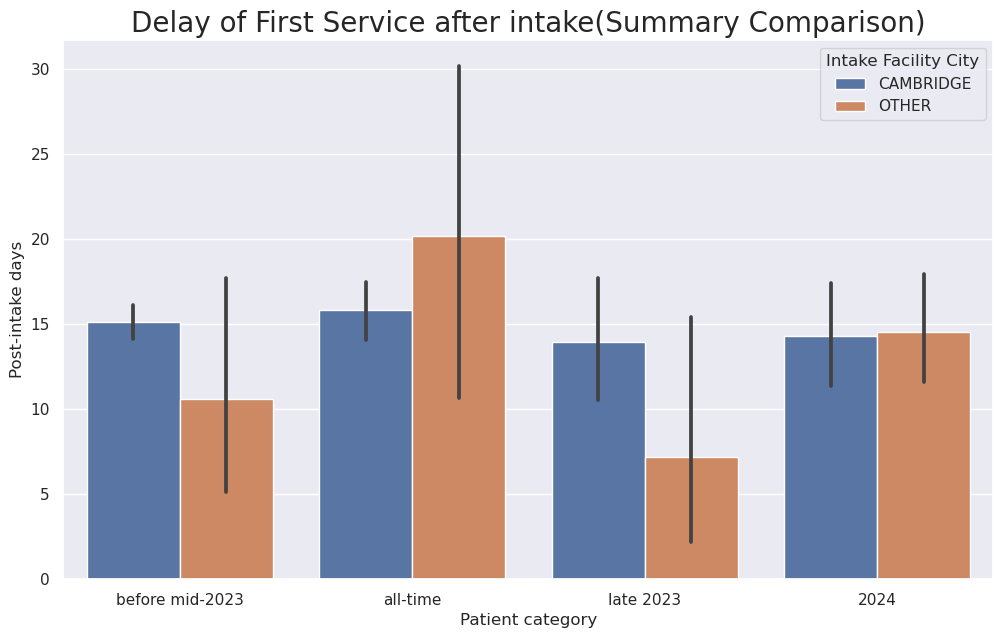

In [6]:
# Now with a bar plot 
plt.figure(figsize=(12, 7))
sns.barplot(x="Patient category", y="Post-intake days", 
            hue="Intake Facility City", data=select_df)
plt.title("Delay of First Service after intake(Summary Comparison)", fontsize=20)

We understand from the first time series analysis, MH infusions started dropping in mid 2023 the situation worsened in 2024. Therefore the findings, insights and recommendations are based on this content

**Results**

- Patients in the late 2023 category had the least post-intake service delays. This might have been attributed due to the short timeframe - patients who existed there for only six months. 
- The 2024 category had a higher delay periods than the before mid-2023 patients(Outside Cambridge). Keep in mind that the patients from the former category had barely received the services for a year while the later category received services for more than 5 years.
- "All time" patients in all facilities had delayed most before receiving their first service after intake. 


<span style="color: orange;">**Insight**</span>: Patients need to be given more time after intake before receiving their first service. This may be as a result of 

* insufficient funds that make the patients shy away from the services. This might be improved by discussion from within. Like how you can provide discounts, offers and coupons. 
* Patients who receive their first service quickly might not have enough time to build trust with the hospital or fully understand the value of MH infusions.
* Those who take longer before the first service may have a stronger commitment to the treatment plan, possibly due to pre-existing relationships or extended education on the importance of the therapy. 
* Patients who take longer to get their first service may have more severe or complex conditions, requiring ongoing attention and more MH infusions.
* Patients with delayed first services might have proactively worked around scheduling constraints, showing a higher level of personal initiative to stay engaged. This is mainly for the all-time patients who have built a rapport with the hospital/facility.
* Patients receiving prompt first services may not experience sufficient follow-up or reminders to continue care.(**This is an idea that I will investigate later**- number of follow-ups over time)

<span style="color: orange;">**Recomendations**</span> 

- Will provide recommendations later 

**Repeat the above for days between the first MH infusion and intake.**

Since we have analyzed the time(in days) it took for the patients to receive their first service after intake, now lets focus on MH infusion. The number of days between intake and the first MH infusion will be analyzed as above. 

Text(0.5, 1.0, 'MH Infusion Delays after intake(Spread and Distribution)')

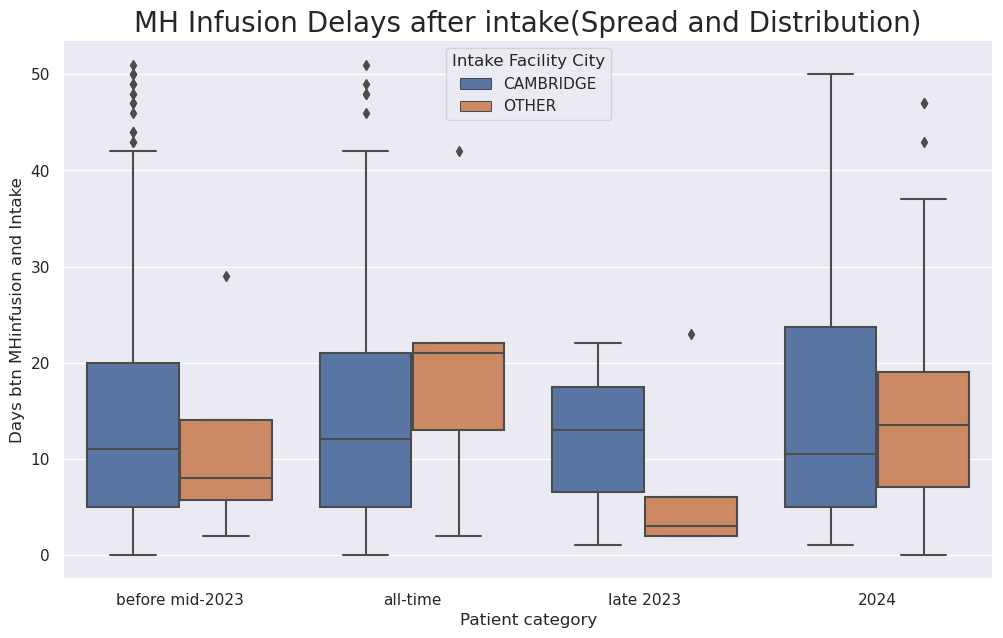

In [7]:
# Post-intake MH infusion Delays
## Select the required columns 
selected_columns = ["Patient category", "Days btn MHinfusion and Intake", "Intake Facility City"]
select_df = df[selected_columns]

## Remove outliers
select_df = remove_outliers(select_df, "Days btn MHinfusion and Intake")

## Plotting 
plt.figure(figsize=(12, 7))
sns.boxplot(x="Patient category", y="Days btn MHinfusion and Intake", 
            hue="Intake Facility City", data=select_df)
plt.title("MH Infusion Delays after intake(Spread and Distribution)", 
         fontsize=20)

Text(0.5, 1.0, 'MH Infusion Delays after intake(Summary Comparison)')

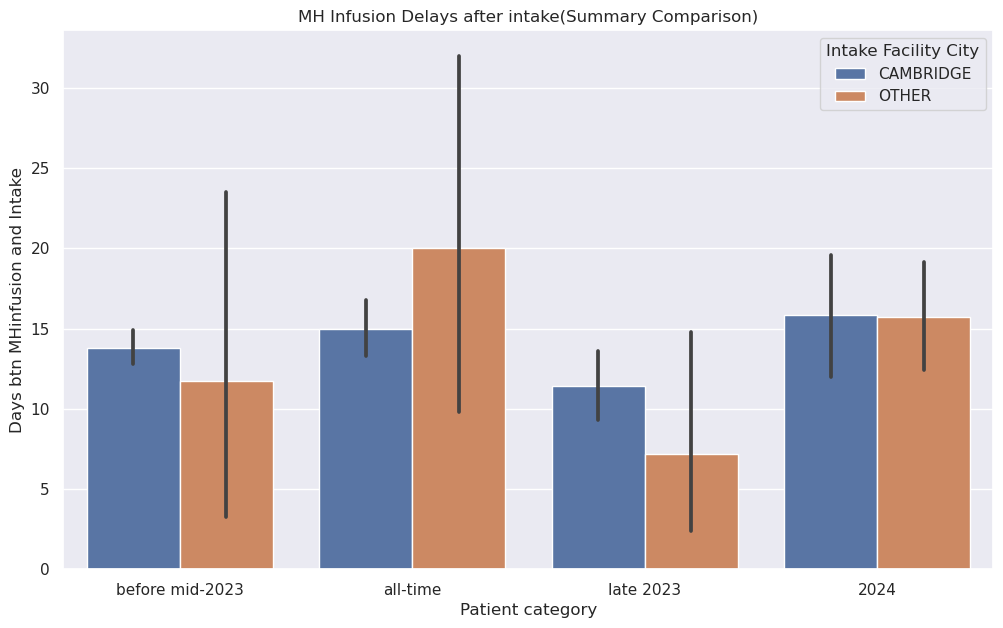

In [8]:
plt.figure(figsize=(12, 7))
sns.barplot(x="Patient category", y="Days btn MHinfusion and Intake", 
            hue="Intake Facility City", data=select_df,
           estimator="mean")
plt.title("MH Infusion Delays after intake(Summary Comparison)")

- Patients that had intake from Cambridge had to wait relatively longer to get their first MH infusion after intake compared to facilities in other cities
- Patients who joined in 2024 waited longer to have their first MH infusion than all time patients and the ones before mid 2023. 
- Patients in late 2023 waited the least. It is practically imposible for them to have longer waiting period since they are the segments that had their first and last service in a span of 6 months (From beginning of July to the end-year).

In Overall, the number of days for patients to get their first MH infusion is almost the same in comparison to their number of days to receive the first service(any). Lets just crosscheck if most of the services the patients received after intake consisted of MH infusion

(-1.25, 1.25, -1.25, 1.25)

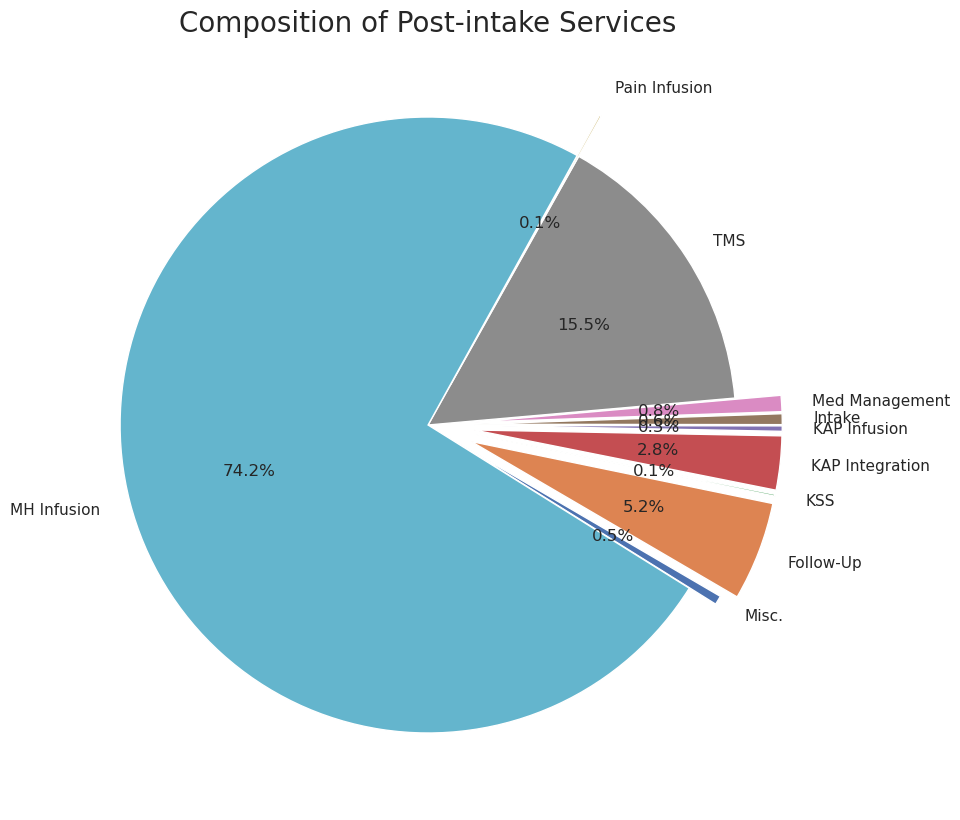

In [14]:
explode = [0.1,0.15,0.15,0.15,0.15,0.15,0.15,0,0.15, 0]

# Shuffle for a cleaner look 
services_series = shuffle(df["First post-intake service"].value_counts(), random_state=201)

# Plot the charts 
services_series.plot(kind="pie", explode=explode, startangle=-32,
                     autopct='%1.1f%%',figsize=(10, 10))
plt.title("Composition of Post-intake Services", fontsize=20)
plt.axis("off")

The chart above explains why the data of first post-intake service and MH infusions are the same. MH infusion comprises of approximately 74% of the total services after intake

**How many days did it take to get the succeeding service? Are there any delays that are connected with MH infusion drop? (Delays increasing or reducing rapidly since mid of 2023).**

The columns "days since last visit" and "days since last MH infusion are to be added" to the appointment(successfull) data set

In [15]:
# Minor data preparation
## Days since last visit
days_since_last_visit = []
delay_for_MHinfusion = []

for index_number in seen_df.index:
    # Note the chart number and the current date
    current_date = seen_df.iloc[index_number]["Date"]
    chart_number = seen_df.iloc[index_number]["Chartnumber"]
    service_type = seen_df.iloc[index_number]["Appt Type Group"] 

    if index_number == 0: # No past records 
        days_since_last_visit.append(np.nan) # add a null point 
        delay_for_MHinfusion.append(np.nan)

    else: # Posibility of past records for the patient 
        # select all the records before it
        records_before = seen_df.iloc[0:index_number] # add null point 
        
        # Select the records before specifically for the patient 
        patients_records_before = records_before[records_before["Chartnumber"]==chart_number]\
        .reset_index(drop=True)
        
        # if no records at all 
        if patients_records_before.shape[0]==0:
            days_since_last_visit.append(np.nan)
            delay_for_MHinfusion.append(np.nan)

        else: # past records exists
            
            # Select the last_record
            last_record = patients_records_before.to_records()[-1]
            # Note the last date 
            last_date = pd.Timestamp(last_record[1])

            delay_days = (current_date - last_date).days
            days_since_last_visit.append(delay_days) # Add the delay days
            
            # Check for MH infusion delays 
            if service_type == 'MH Infusion':
                delay_for_MHinfusion.append(delay_days)
            else:
                delay_for_MHinfusion.append(np.nan)
            
            

In [16]:
# add to the dataframe
seen_df["Days since last visit"] = days_since_last_visit
seen_df["Delay for MH infusion"] = delay_for_MHinfusion

In [17]:
# Data Preparation 
## Specicifically for MH infusion
MHinfusion_delays_df = seen_df[["Date", "Delay for MH infusion"]].groupby("Date").mean()
MHinfusion_delays_df.dropna(how="any", inplace=True) # Drop null records

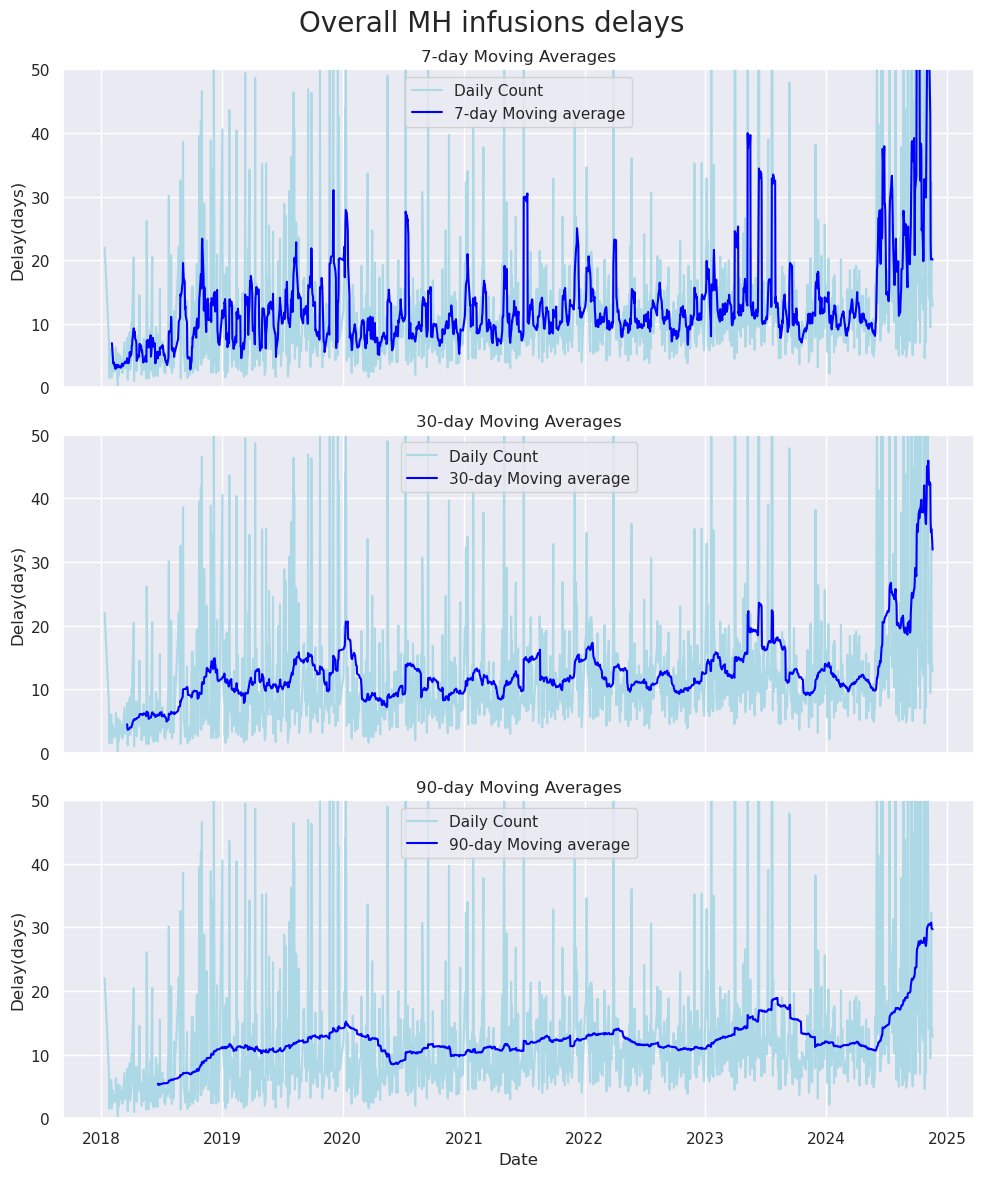

In [33]:
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
MHinfusion_delays_df["7_day_MA"] = MHinfusion_delays_df["Delay for MH infusion"].rolling(window=7).mean()
## Plotting
axes[0].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[0].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Delay(days)")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
MHinfusion_delays_df["30_day_MA"] = MHinfusion_delays_df["Delay for MH infusion"].rolling(window=30).mean()
## Plotting
axes[1].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[1].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Delay(days)")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
MHinfusion_delays_df["90_day_MA"] = MHinfusion_delays_df["Delay for MH infusion"].rolling(window=90).mean()
## Plotting
axes[2].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[2].plot(MHinfusion_delays_df.index, MHinfusion_delays_df["90_day_MA"],
        label = "90-day Moving average", color="blue")
axes[2].set_ylabel("Delay(days)")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
axes[2].set_ylim(0, 50)

plt.suptitle("Overall MH infusions delays", fontsize=20)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

There was a gradual increase in delays between MH infusions. The situation became more clear in the beginning of 2024. MH infusions were delayed below 10 days in the beginning (2017-2018) and it increased to approximately 30 days on average in 2024. Before we dig into insights and provide recommendations, we should ask, "Did this happen in Cambridge alone or the situation went across all facilities? **What if we compared Cambridge and other facilities?**

*Compare Cambridge vs. Other Cities*

In [19]:
# Prepare the data
## Cambridge facilities 
cambridge_mhinfusion_delays = seen_df[seen_df["Facility City"]=="CAMBRIDGE"][["Date", "Delay for MH infusion"]]
cambridge_mhinfusion_delays = cambridge_mhinfusion_delays.groupby("Date").mean()

### Clean the data
cambridge_mhinfusion_delays.dropna(how="any", inplace=True)

## Other city facilities 
other_mhinfusion_delays = seen_df[seen_df["Facility City"]!="CAMBRIDGE"][["Date", "Delay for MH infusion"]]
other_mhinfusion_delays = other_mhinfusion_delays.groupby("Date").mean()

### Clean the data 
other_mhinfusion_delays.dropna(how="any", inplace=True)

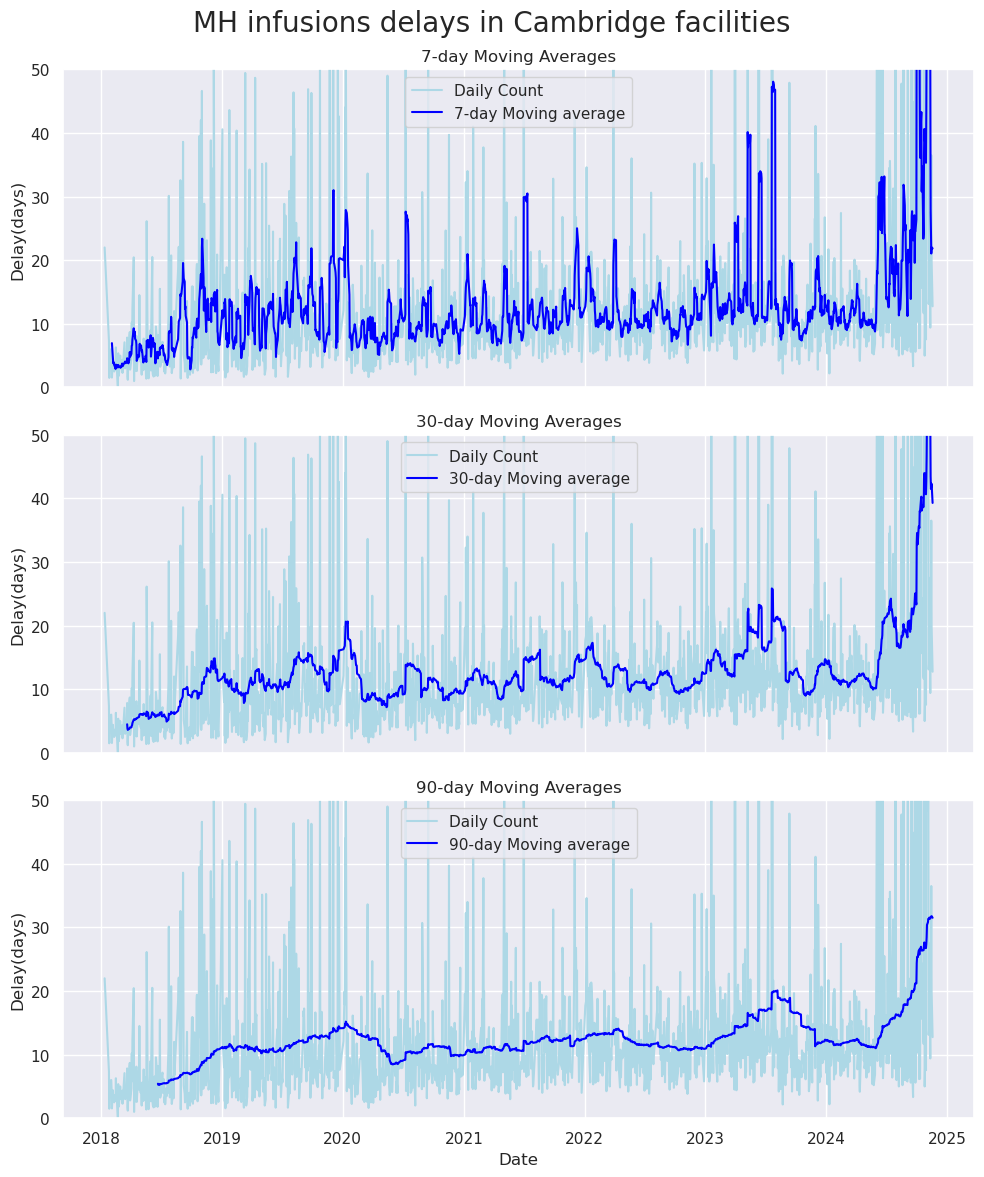

In [20]:
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
cambridge_mhinfusion_delays["7_day_MA"] = cambridge_mhinfusion_delays["Delay for MH infusion"].rolling(window=7).mean()
## Plotting
axes[0].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[0].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Delay(days)")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
cambridge_mhinfusion_delays["30_day_MA"] = cambridge_mhinfusion_delays["Delay for MH infusion"].rolling(window=30).mean()
## Plotting
axes[1].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[1].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Delay(days)")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
cambridge_mhinfusion_delays["90_day_MA"] = cambridge_mhinfusion_delays["Delay for MH infusion"].rolling(window=90).mean()
## Plotting
axes[2].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[2].plot(cambridge_mhinfusion_delays.index, cambridge_mhinfusion_delays["90_day_MA"],
        label = "90-day Moving average", color="blue")
axes[2].set_ylabel("Delay(days)")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
axes[2].set_ylim(0, 50)

plt.suptitle("MH infusions delays in Cambridge facilities", fontsize=20)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

In the beginning of 2024 there is a sharp notable increase in successive MH infusion delays. The was flat(constant) with seasonal oscillations but in 2024 it started increasing in Cambridge. Lets check the performance in other facilities. 

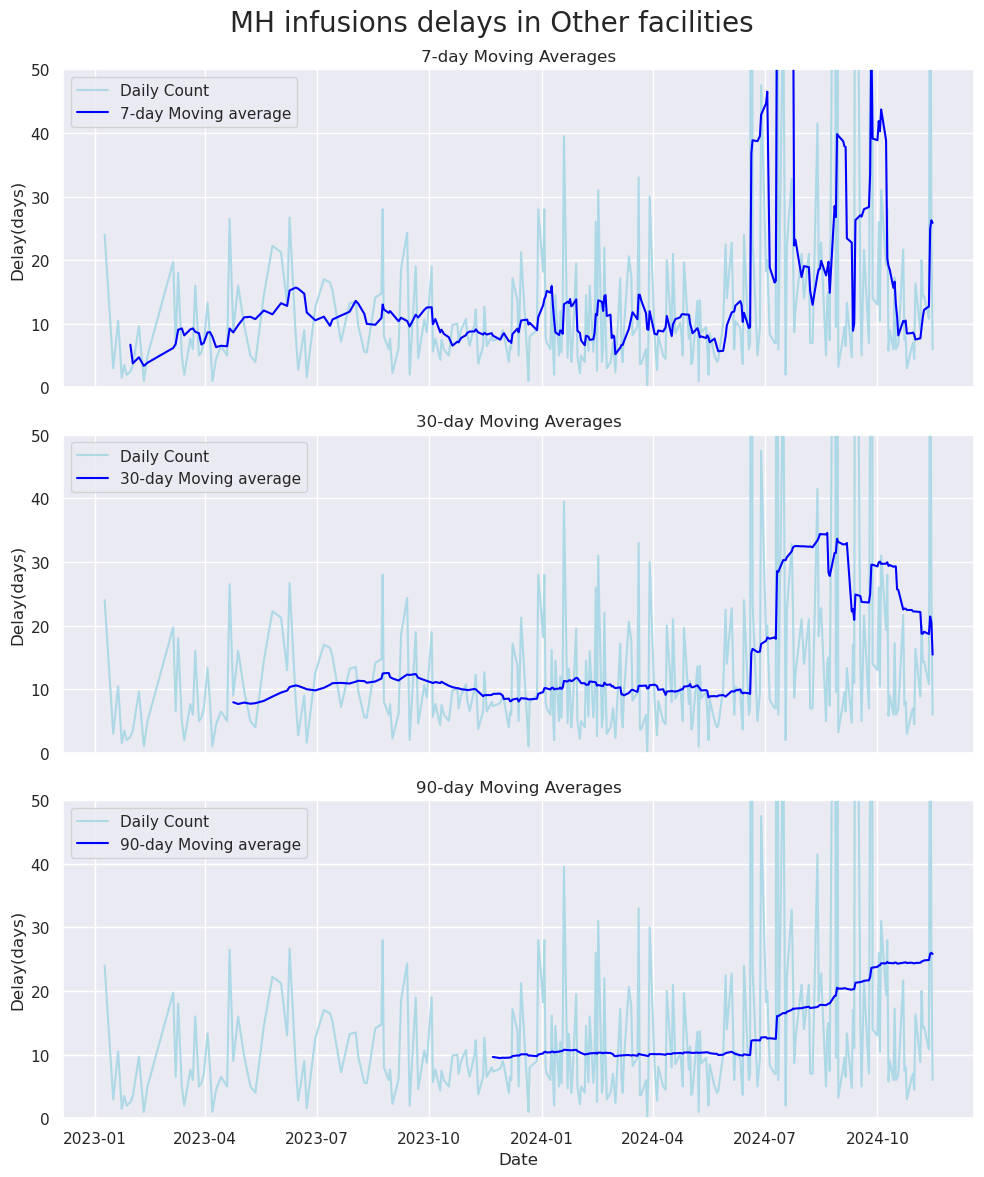

In [34]:
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
other_mhinfusion_delays["7_day_MA"] = other_mhinfusion_delays["Delay for MH infusion"].rolling(window=7).mean()
## Plotting
axes[0].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[0].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Delay(days)")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
other_mhinfusion_delays["30_day_MA"] = other_mhinfusion_delays["Delay for MH infusion"].rolling(window=30).mean()
## Plotting
axes[1].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[1].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Delay(days)")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
other_mhinfusion_delays["90_day_MA"] = other_mhinfusion_delays["Delay for MH infusion"].rolling(window=90).mean()
## Plotting
axes[2].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["Delay for MH infusion"],
        label = "Daily Count", color="lightblue")
axes[2].plot(other_mhinfusion_delays.index, other_mhinfusion_delays["90_day_MA"],
        label = "90-day Moving average", color="blue")
axes[2].set_ylabel("Delay(days)")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
axes[2].set_ylim(0, 50)

plt.suptitle("MH infusions delays in Other facilities", fontsize=20)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

There is a flat trend before 2024 and the situation becomes unstable at the onset of 2024 with very high delays and low delays (as beginning)

Lets not now focus on MH infusions alone. We will check how the situation goes across all the services offered. Are the delays increasing or decreasing between all successive services? 

In [37]:
# Prepare data 
## Days since last visit exclusive data 
last_visit_df = seen_df[["Date", "Days since last visit"]].groupby("Date").mean()
last_visit_df.dropna(how="any", inplace=True) # Drop null records

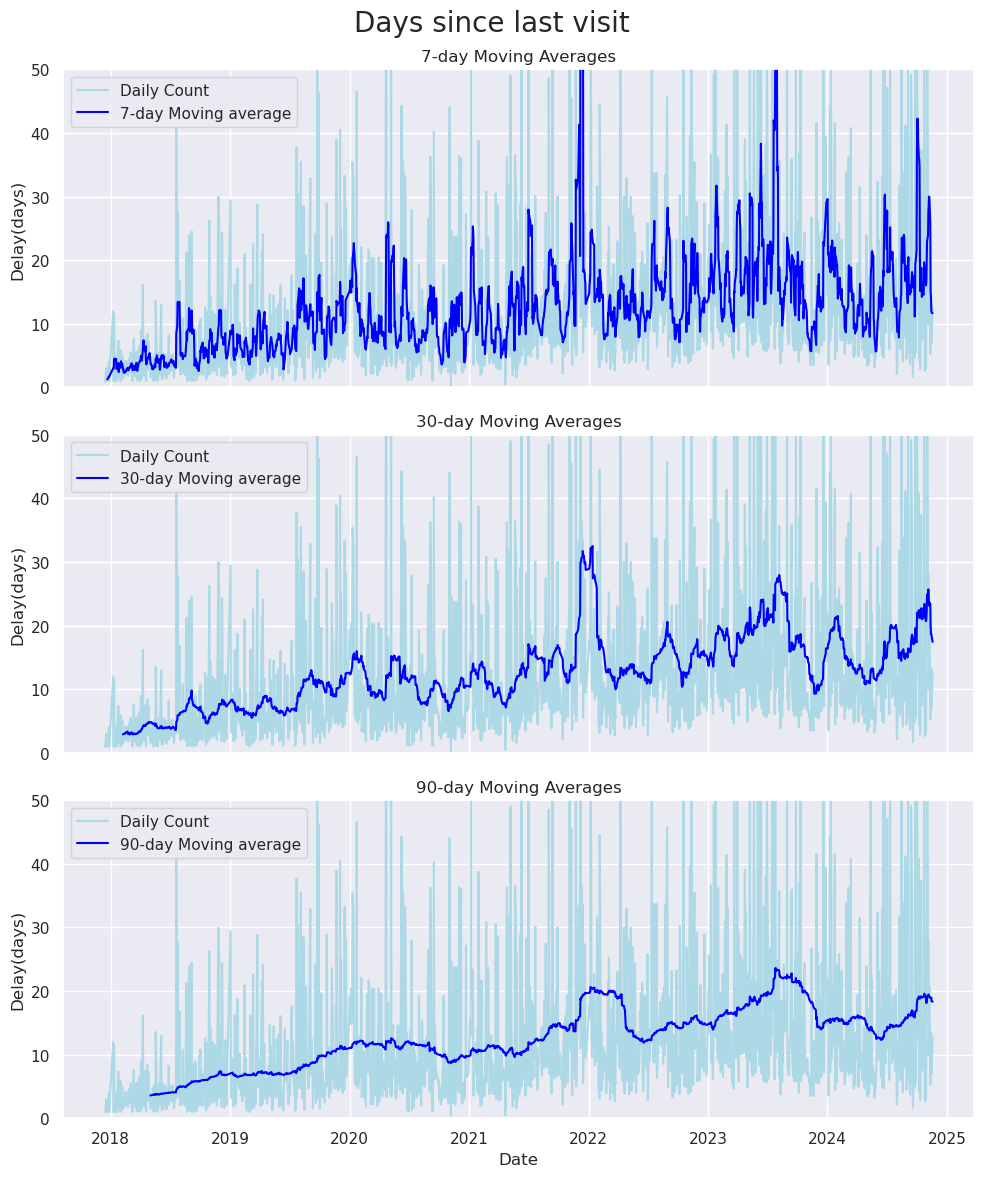

In [38]:
# Plot a line for days since last visit
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
last_visit_df["7_day_MA"] = last_visit_df["Days since last visit"].rolling(window=7).mean()
## Plotting
axes[0].plot(last_visit_df.index, last_visit_df["Days since last visit"],
        label = "Daily Count", color="lightblue")
axes[0].plot(last_visit_df.index, last_visit_df["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Delay(days)")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
last_visit_df["30_day_MA"] = last_visit_df["Days since last visit"].rolling(window=30).mean()
## Plotting
axes[1].plot(last_visit_df.index, last_visit_df["Days since last visit"],
        label = "Daily Count", color="lightblue")
axes[1].plot(last_visit_df.index, last_visit_df["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Delay(days)")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
last_visit_df["90_day_MA"] = last_visit_df["Days since last visit"].rolling(window=90).mean()
## Plotting
axes[2].plot(last_visit_df.index, last_visit_df["Days since last visit"],
        label = "Daily Count", color="lightblue")
axes[2].plot(last_visit_df.index, last_visit_df["90_day_MA"],
        label = "90-day Moving average", color="blue")
axes[2].set_ylabel("Delay(days)")
axes[2].set_title("90-day Moving Averages")
axes[2].legend()
axes[2].set_ylim(0, 50)

plt.suptitle("Days since last visit", fontsize=20)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

From the line chart above there is a flat trend with a gradual increase  in delays over time. Unlike the MH infusions, the situation here is stable. 

- Cause --> increase in people who need services has affected scheduling of appointments. Therefore is increase in the overall delay thereby reduction of MH infusions over time. 

**Questions to ask**
Following this analysis of delay days since intake and successive services(especially between MHinfusion and other services). We need to get this points clear. 

* Are the increasing costs(results from previous analysis) driving away patients? 
* Are there no enough expertise to work on MH infusions. 
* Are there any follow-ups for patients to check on their progress? (**to be investigated**)
* Are there any ethical standards breached. 
* Did the patients understand the importance of Infusions 
* Are there any negative side effects after the services(due to inexpertise) that make the patients consider fewer infusions. 
* Has the MH infusions become more effective that the patients need less and less to be effective? (which is positive)

**Are patients preferring other facilities outside Cambridge after their intake?**

Lets focus on those who had their intake in Cambridge

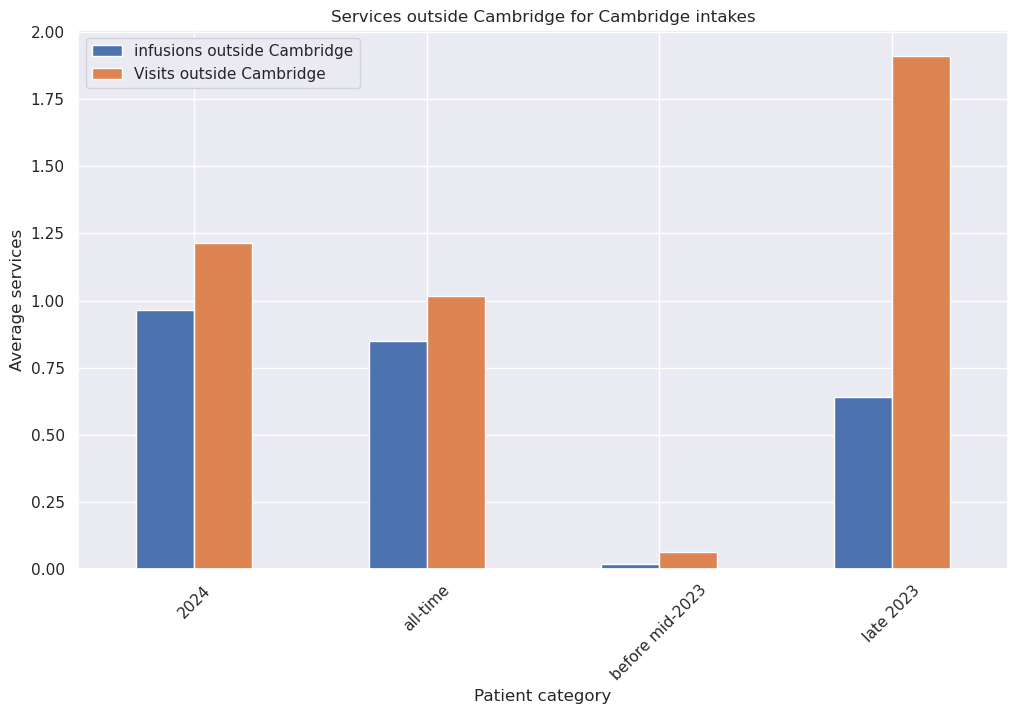

In [39]:
cambridge_df = df[df["Intake Facility City"]=="CAMBRIDGE"]
# required columns 
select_columns = ["Patient category", "infusions outside Cambridge", "Visits outside Cambridge"]

# plot the data 
cambridge_df[select_columns].groupby("Patient category").mean().plot(kind="bar", 
                                                                     figsize=(12, 7), rot=45)
plt.title("Services outside Cambridge for Cambridge intakes")
plt.ylabel("Average services")
plt.show()

It is evident from the bar chart that there is a general increase in number of patients who received services outside Cambridge after mid 2023. 2024 patients(Cambridge intakes) took the lead(an average of atleast 1 MH infusion) while late 2023 patients took the lead in number of overall services(an average of aproximately 2 services). Lets find how it differs with the non Cambridge intakes.  

Text(0, 0.5, 'Average Services')

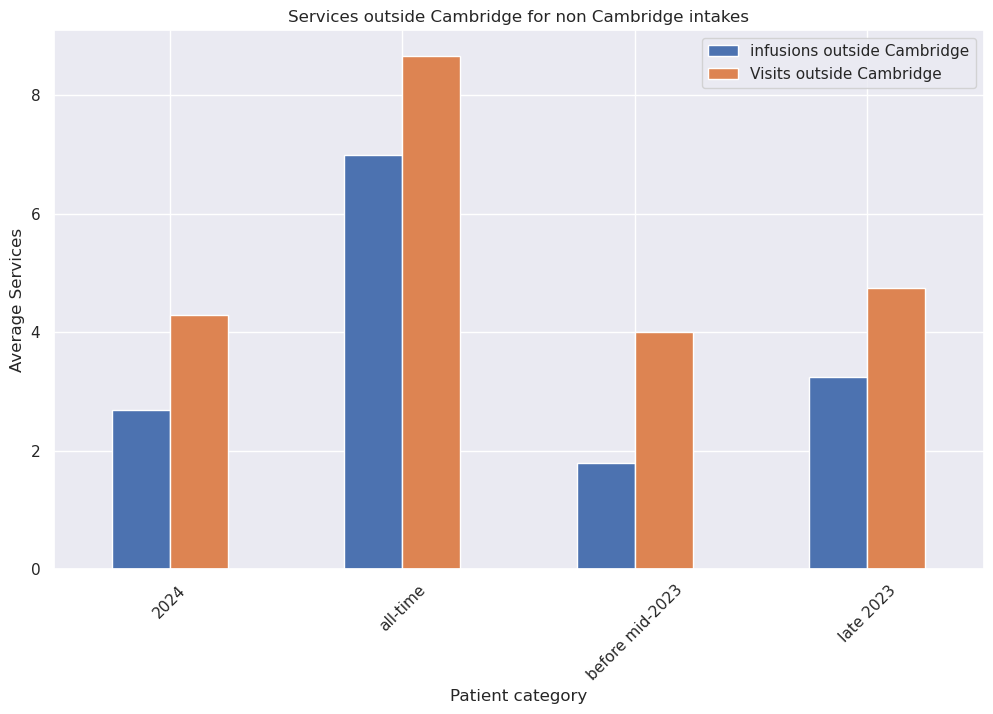

In [40]:
other_df = df[df["Intake Facility City"]!="CAMBRIDGE"]

# plot the data 
other_df[select_columns].groupby("Patient category").mean().plot(kind="bar",
                                                                 figsize=(12, 7), rot=45)
plt.title("Services outside Cambridge for non Cambridge intakes")
plt.ylabel("Average Services")

For those patients who enrolled in the facilities outside Cambridge had an increasing number of MH infusion and services in general in their facilities. "All-time" patients took the lead followed by late 2023, 2024 patients wile before mid-2023 was the least. The patients after 2023 took at least 3 MH infusions on average outside Cambridge. 

**Are there enough campaigns and conversions? This will be determine by the number of intakes over time.**

<Axes: xlabel='Date'>

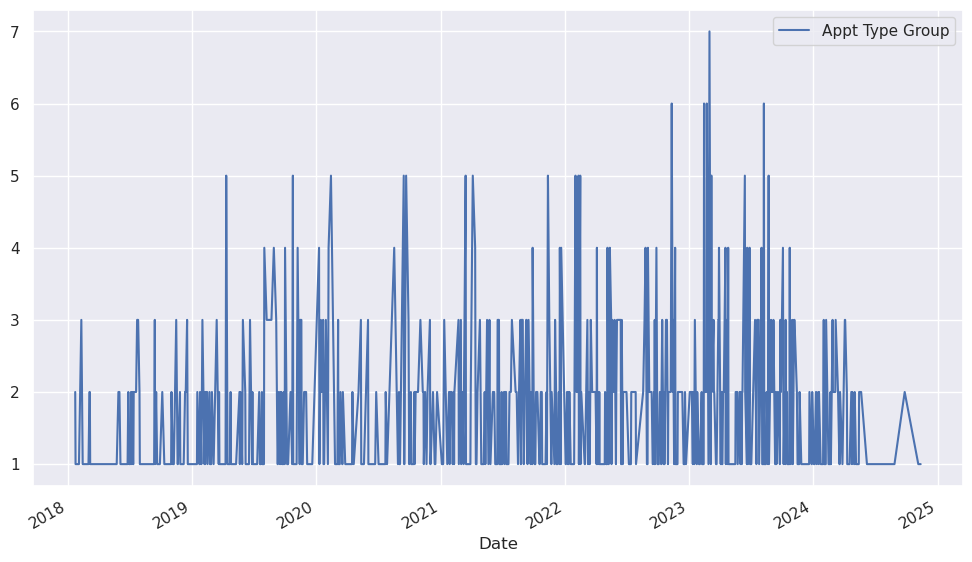

In [41]:
# - Filter the data intakes 
cambridge_intakes_df = seen_df[(seen_df["Appt Type Group"]=="Intake")&(seen_df["Facility City"]=="CAMBRIDGE")]

# - Calculate the daily count of intakes 
cambridge_intakes_df = cambridge_intakes_df[["Date", "Appt Type Group"]].groupby("Date").count()

# - Plot it on a line chart 
cambridge_intakes_df.plot(figsize=(12, 7))

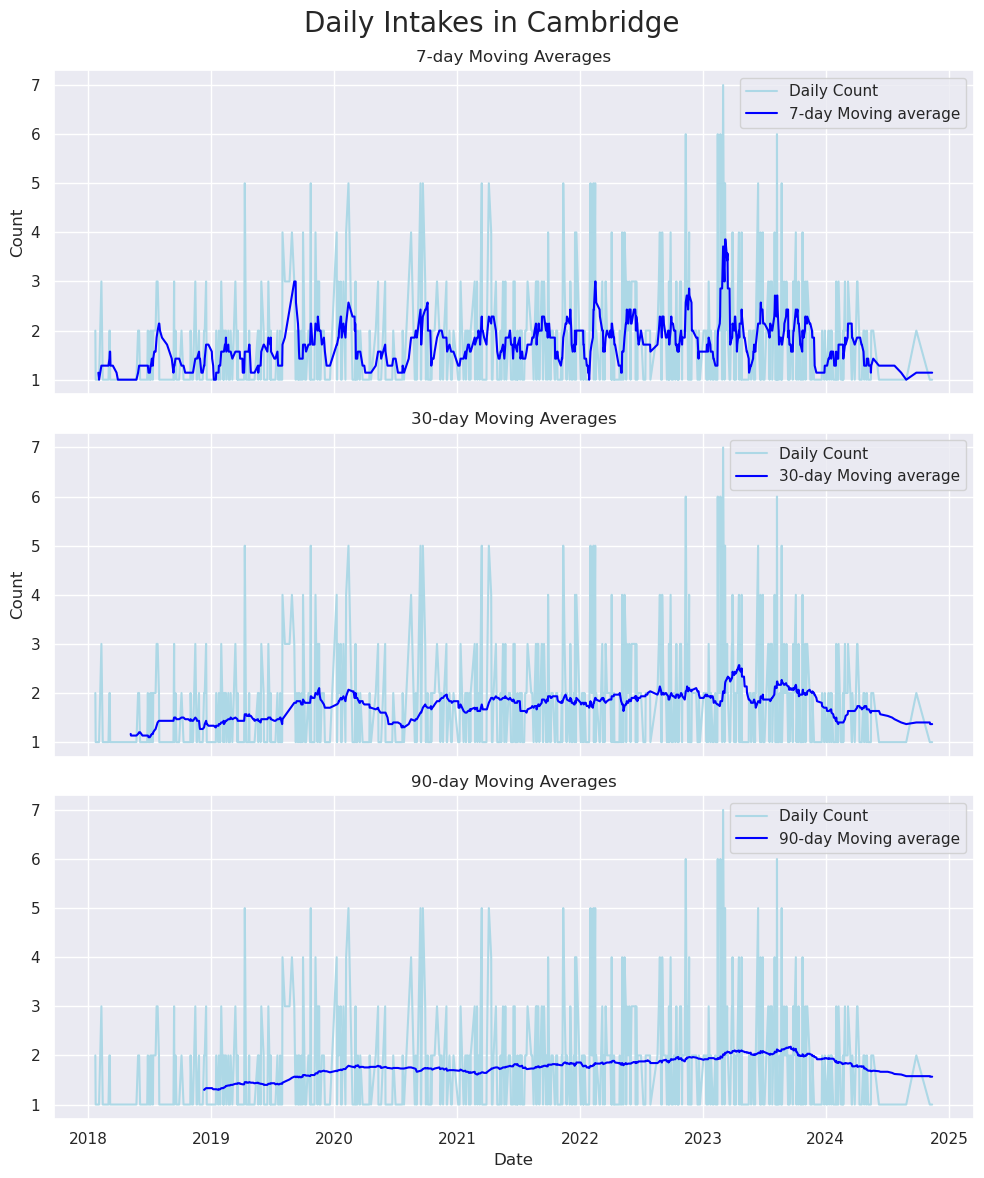

In [42]:
# Plot a line for number of intakes per day
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
cambridge_intakes_df["7_day_MA"] = cambridge_intakes_df["Appt Type Group"].rolling(window=7).mean()
## Plotting
axes[0].plot(cambridge_intakes_df.index, cambridge_intakes_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[0].plot(cambridge_intakes_df.index, cambridge_intakes_df["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Count")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
# axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
cambridge_intakes_df["30_day_MA"] = cambridge_intakes_df["Appt Type Group"].rolling(window=30).mean()
## Plotting
axes[1].plot(cambridge_intakes_df.index, cambridge_intakes_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[1].plot(cambridge_intakes_df.index, cambridge_intakes_df["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Count")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
# axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
cambridge_intakes_df["90_day_MA"] = cambridge_intakes_df["Appt Type Group"].rolling(window=90).mean()
## Plotting
axes[2].plot(cambridge_intakes_df.index, cambridge_intakes_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[2].plot(cambridge_intakes_df.index, cambridge_intakes_df["90_day_MA"],
        label = "90-day Moving average", color="blue")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
# axes[2].set_ylim(0, 50)

plt.suptitle("Daily Intakes in Cambridge", fontsize=20)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

There is a gradual increase in number of intakes in the Cambridge facilities daily but starts dropping after mid-2023. This should be fixed by increased campaigns and awareness on mental health to the public. *Lets check how non cambridge facilities performed*

In [43]:
# - Filter the data intakes 
non_cambridge_intakes_df = seen_df[(seen_df["Appt Type Group"]=="Intake")&(seen_df["Facility City"]!="CAMBRIDGE")]

# - Calculate the daily count of intakes 
non_cambridge_intakes_df = non_cambridge_intakes_df[["Date", "Appt Type Group"]].groupby("Date").count()

# # - Plot it on a line chart 
# non_cambridge_intakes_df.plot(figsize=(12, 7))

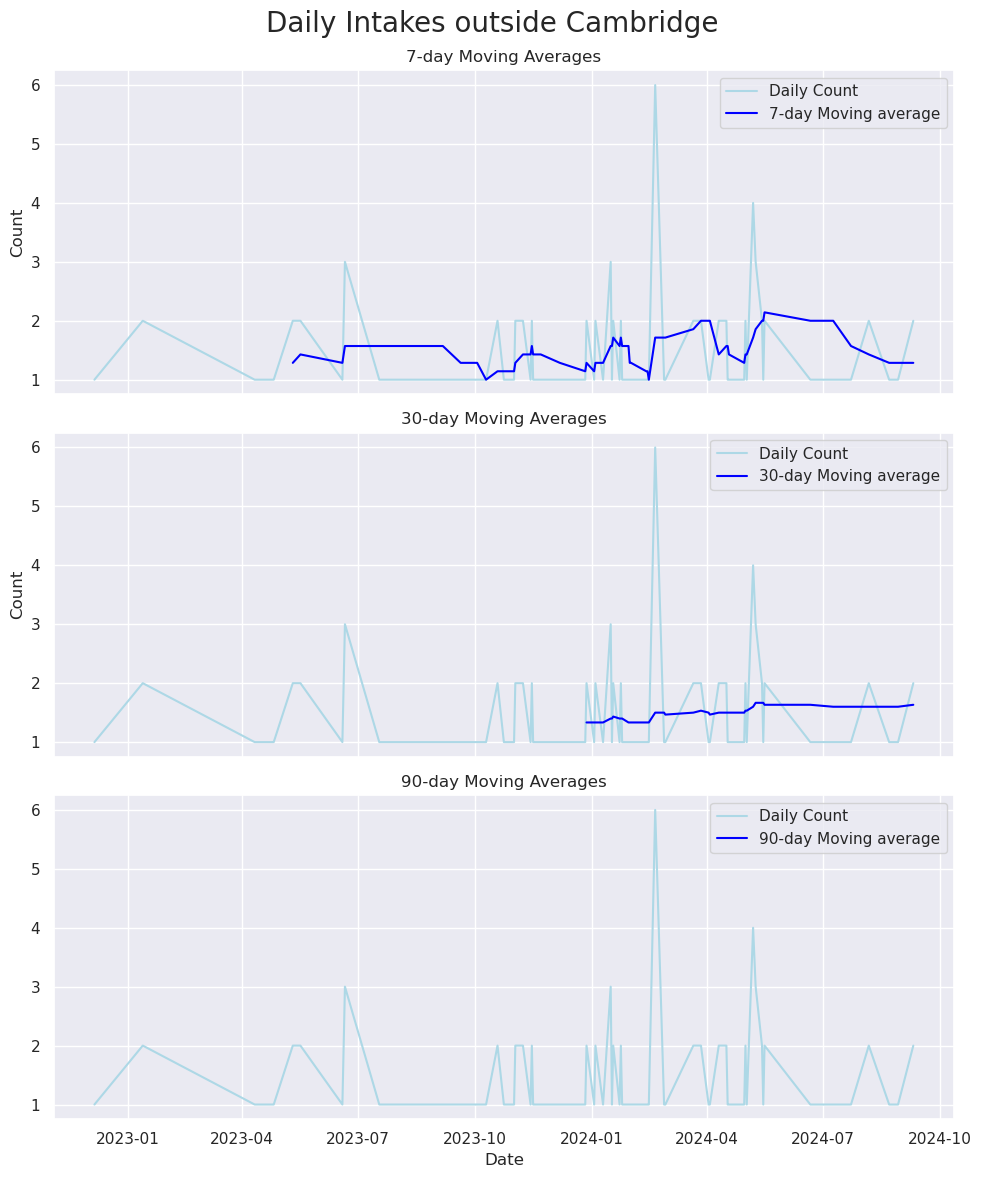

In [44]:
# Plot a line for number of intakes per day
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
non_cambridge_intakes_df["7_day_MA"] = non_cambridge_intakes_df["Appt Type Group"].rolling(window=7).mean()
## Plotting
axes[0].plot(non_cambridge_intakes_df.index, non_cambridge_intakes_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[0].plot(non_cambridge_intakes_df.index, non_cambridge_intakes_df["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Count")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
# axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
non_cambridge_intakes_df["30_day_MA"] = non_cambridge_intakes_df["Appt Type Group"].rolling(window=30).mean()
## Plotting
axes[1].plot(non_cambridge_intakes_df.index, non_cambridge_intakes_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[1].plot(non_cambridge_intakes_df.index, non_cambridge_intakes_df["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Count")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
# axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
non_cambridge_intakes_df["90_day_MA"] = non_cambridge_intakes_df["Appt Type Group"].rolling(window=90).mean()
## Plotting
axes[2].plot(non_cambridge_intakes_df.index, non_cambridge_intakes_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[2].plot(non_cambridge_intakes_df.index, non_cambridge_intakes_df["90_day_MA"],
        label = "90-day Moving average", color="blue")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
# axes[2].set_ylim(0, 50)

plt.suptitle("Daily Intakes outside Cambridge", fontsize=20)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

The trend of intakes in non-cambridge facilities in flat and unclear. It some times drops to zero and oscillates between zero and one. May be the facilities are used to refer patients due to other reasons like transport(distance),lack of enough experts to treat the patients in Cambridge, and inability to hold many patients in the Cambridge facility etc. 

**Questions to ask**

- Is there any change on campaigns(how patients heard about you)
- Is there any SEO on the website to get more recognition? If there is, is it effective?(like geo-targeted) Targeting the right audience? 
- Do you have referral programs - There should be Pirate metrics (AARRR) analysis on both the website and the cambridge facilities. 
- Did the consultation/admission fee introduced or increased? 
- Do patients in United States started to prefer insurance payments due to the rising costs in Health Services but this facility has restrictions on the use of insurance? 

*More ideas will emerge as we progress with the analysis*

**Work on follow-ups** over time

In [45]:
# - Filter the data follow ups 
cambridge_followups_df = seen_df[(seen_df["Appt Type Group"]=="Follow-Up")&(seen_df["Facility City"]=="CAMBRIDGE")]

# - Calculate the daily count of follow ups 
cambridge_followups_df = cambridge_followups_df[["Date", "Appt Type Group"]].groupby("Date").count()

# # - Plot it on a line chart 
# cambridge_followups_df.plot(figsize=(12, 7))

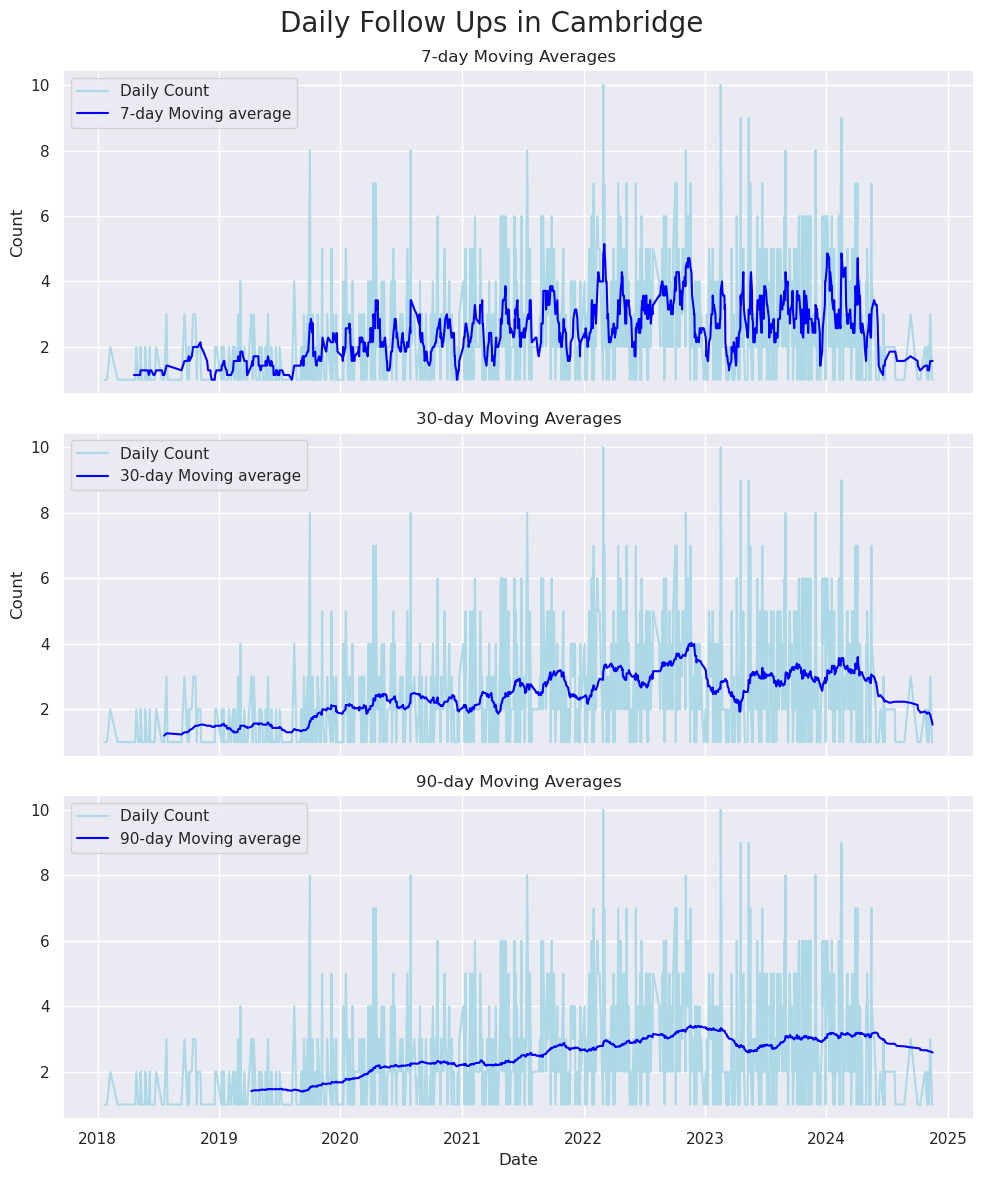

In [46]:
# Plot a line for number of intakes per day
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
cambridge_followups_df["7_day_MA"] = cambridge_followups_df["Appt Type Group"].rolling(window=7).mean()
## Plotting
axes[0].plot(cambridge_followups_df.index, cambridge_followups_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[0].plot(cambridge_followups_df.index, cambridge_followups_df["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Count")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
# axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
cambridge_followups_df["30_day_MA"] = cambridge_followups_df["Appt Type Group"].rolling(window=30).mean()
## Plotting
axes[1].plot(cambridge_followups_df.index, cambridge_followups_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[1].plot(cambridge_followups_df.index, cambridge_followups_df["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Count")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
# axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
cambridge_followups_df["90_day_MA"] = cambridge_followups_df["Appt Type Group"].rolling(window=90).mean()
## Plotting
axes[2].plot(cambridge_followups_df.index, cambridge_followups_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[2].plot(cambridge_followups_df.index, cambridge_followups_df["90_day_MA"],
        label = "90-day Moving average", color="blue")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
# axes[2].set_ylim(0, 50)

plt.suptitle("Daily Follow Ups in Cambridge", fontsize=20)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [47]:
# - Filter the data intakes 
non_cambridge_followups_df = seen_df[(seen_df["Appt Type Group"]=="Follow-Up")&(seen_df["Facility City"]!="CAMBRIDGE")]

# - Calculate the daily count of intakes 
non_cambridge_followups_df = non_cambridge_followups_df[["Date", "Appt Type Group"]].groupby("Date").count()

# # - Plot it on a line chart 
# non_cambridge_intakes_df.plot(figsize=(12, 7))

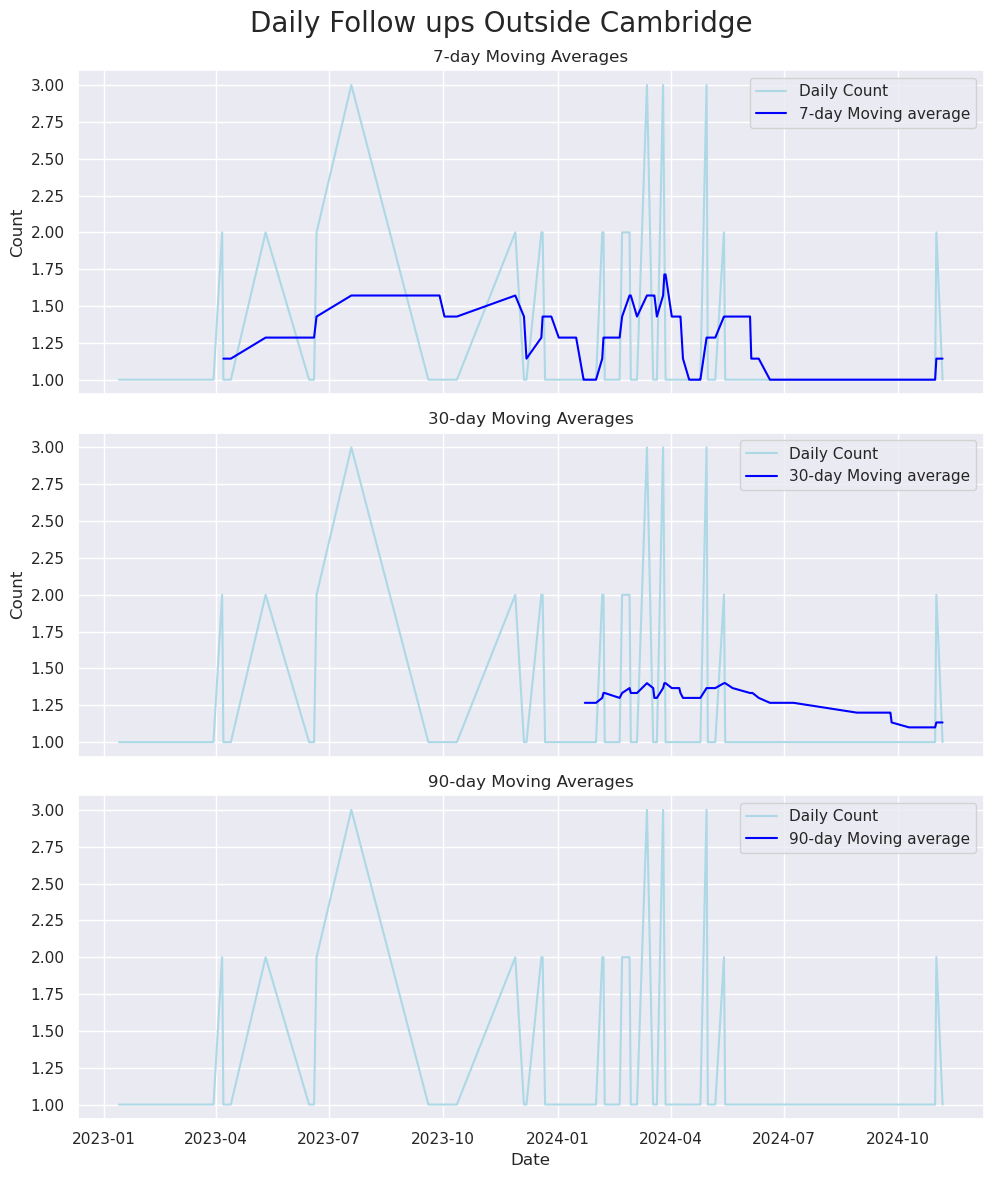

In [48]:
# Plot a line for number of intakes per day
# Create subplots  
fig, axes = plt.subplots(nrows=3, ncols=1,
                        figsize=(10, 12), sharex=True)

# 7-day Moving average plot 
non_cambridge_followups_df["7_day_MA"] = non_cambridge_followups_df["Appt Type Group"].rolling(window=7).mean()
## Plotting
axes[0].plot(non_cambridge_followups_df.index, non_cambridge_followups_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[0].plot(non_cambridge_followups_df.index, non_cambridge_followups_df["7_day_MA"],
        label = "7-day Moving average", color="blue")
axes[0].set_ylabel("Count")

axes[0].set_title("7-day Moving Averages")
axes[0].legend()
# axes[0].set_ylim(0, 50)

# 30-day Moving average plot 
non_cambridge_followups_df["30_day_MA"] = non_cambridge_followups_df["Appt Type Group"].rolling(window=30).mean()
## Plotting
axes[1].plot(non_cambridge_followups_df.index, non_cambridge_followups_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[1].plot(non_cambridge_followups_df.index, non_cambridge_followups_df["30_day_MA"],
        label = "30-day Moving average", color="blue")
axes[1].set_ylabel("Count")

axes[1].set_title("30-day Moving Averages")
axes[1].legend()
# axes[1].set_ylim(0, 50)

# 90-day Moving average plot 
non_cambridge_followups_df["90_day_MA"] = non_cambridge_followups_df["Appt Type Group"].rolling(window=90).mean()
## Plotting
axes[2].plot(non_cambridge_followups_df.index, non_cambridge_followups_df["Appt Type Group"],
        label = "Daily Count", color="lightblue")
axes[2].plot(non_cambridge_followups_df.index, non_cambridge_followups_df["90_day_MA"],
        label = "90-day Moving average", color="blue")

axes[2].set_title("90-day Moving Averages")
axes[2].legend()
# axes[2].set_ylim(0, 50)

plt.suptitle("Daily Follow ups Outside Cambridge", fontsize=20)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

**Results**

There is a gradual decline in follow-ups and situation escalates in mid-2024. 

**Questions to ask**

- Is the staff loosing morale on follow-ups due to negative/no response? 
-

**Drill down into specific factors**

1. Patients with very few visits and high delays. What patterns emerge?

In [ ]:
# below 5 visits
df["Visits"].describe()

In [ ]:
# Extreme - post intake = over one month(30days)
df["Post-intake days"].describe()

In [ ]:
df[(df["Post-intake days"]>30)&(df["Visits"]<5)]

There is a great performance here like it consists of MH Infusions and follow ups. Most of is in Cambridge. Nothing negative to point out